In [1]:
import numpy as np
import timeit
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from copy import deepcopy as copy
from typing import List, Tuple

# MCTS code imports
sys.path.append("..")  # Adds higher directory to python modules path.
from state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image, get_image_based_state
from main import MeasurementControlEnvironment
from mcts.mcts import mcts_search, get_best_action_trajectory
from mcts.tree_viz import render_pyvis
from utils import rotate_about_point
from exploration_grid import ExplorationGrid

### Create Game Environment and RL Wrapper (This initializes NN at random)

In [2]:
# Create the environment and RL wrapper (This initiailizes a new random nerual network)
env = MeasurementControlEnvironment(notebook=True, no_flask_server=True)
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)
explore_grid = ExplorationGrid(env, env.mean_corners_bounds, padding=np.array([15,15]), meters_per_pixel=1)

Toy Measurement Control Initialized
Using device: cuda
Model loaded


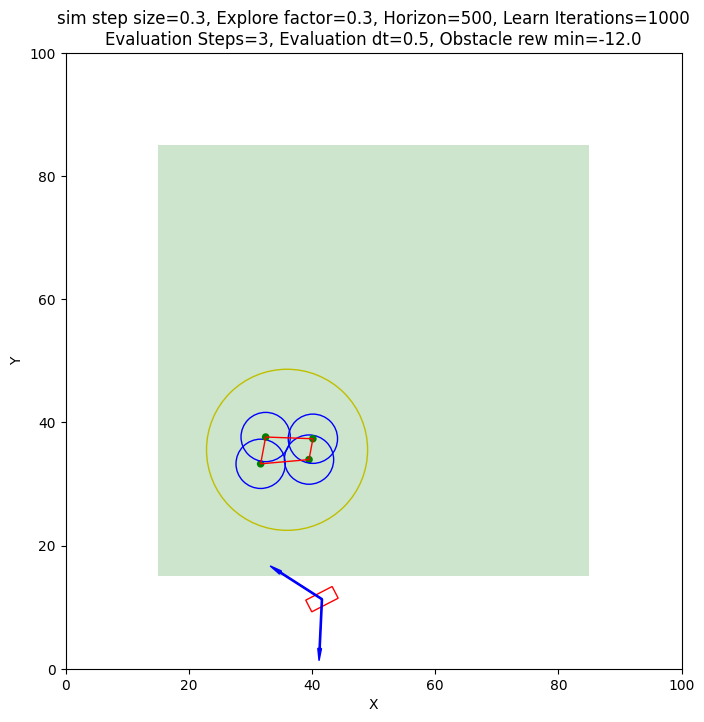

In [3]:
# Generate a random starting state and draw the grid and state
starting_state = env.reset()
explore_grid.draw_grid(explore_grid.grid)
env.draw_state(starting_state)

Time to update: 0.0015178889989329036
new car state: [40.00537432 10.54202517  5.89620742 -2.70487722 -0.06537418 -0.21791394]
new car state: [38.05745879  9.94373926  6.79241484 -2.84359687 -0.19612255 -0.43582788]
new car state: [35.75183896 10.01051723  7.68862226  3.11263762 -0.39224509 -0.65374182]
new car state: [33.7904085  11.67956715  8.58482969  2.436556   -0.50846586  0.        ]
new car state: [33.12596491 14.4451811   9.48103711  1.80657933 -0.50846586  0.        ]


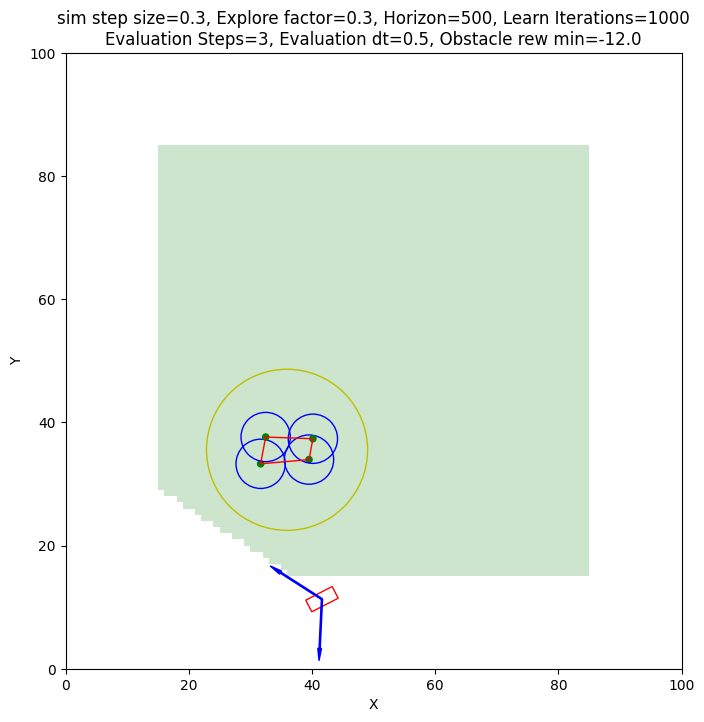

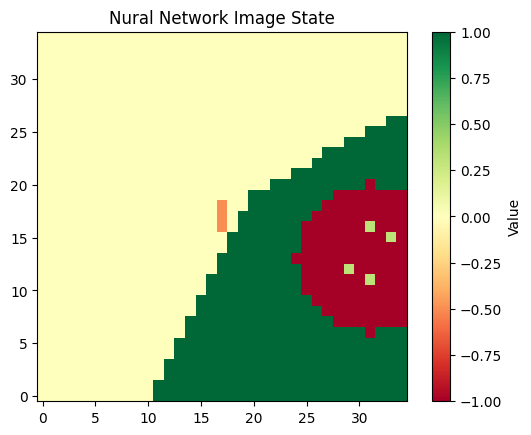

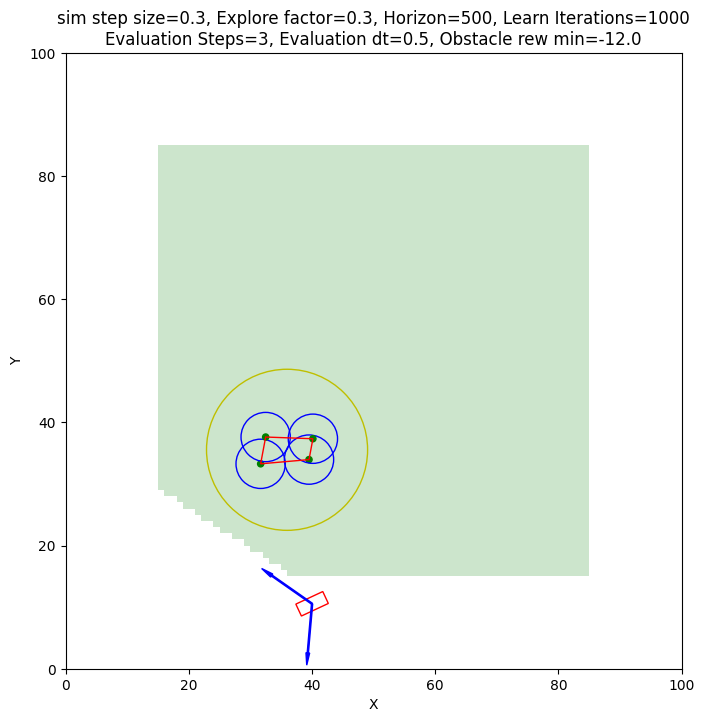

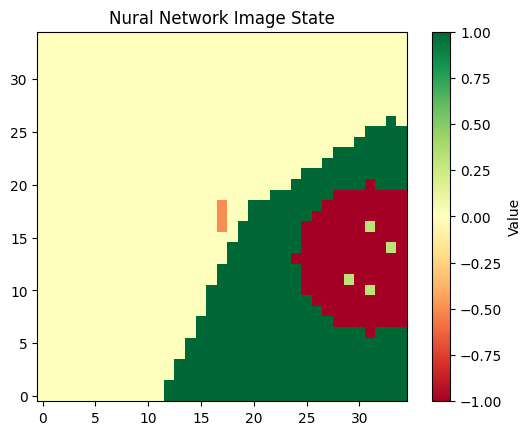

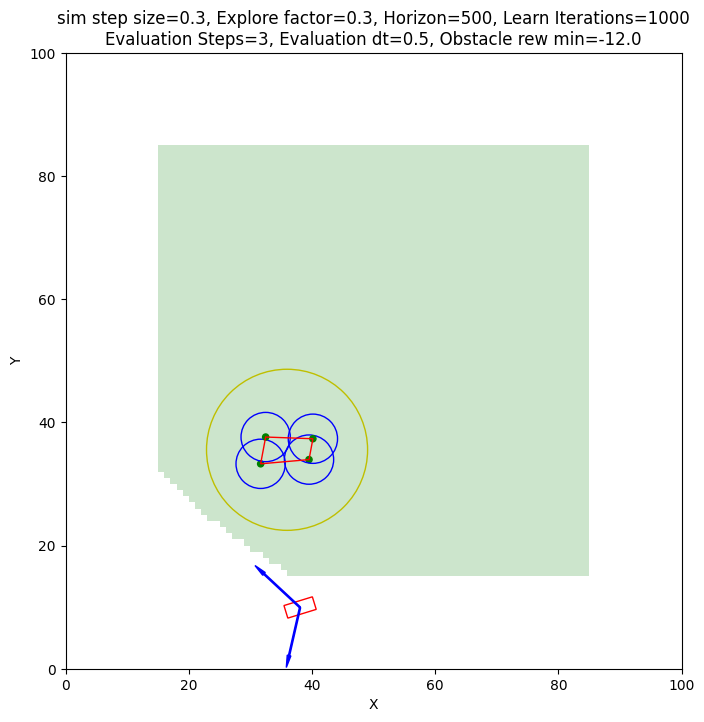

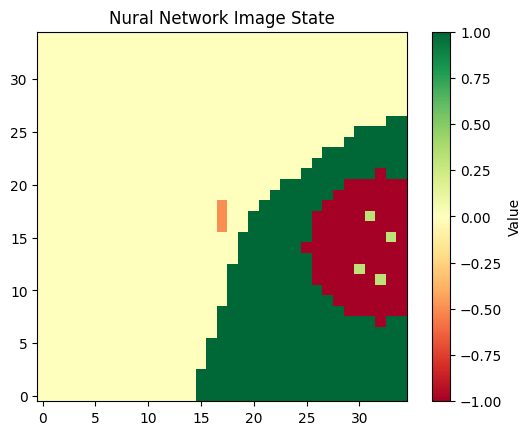

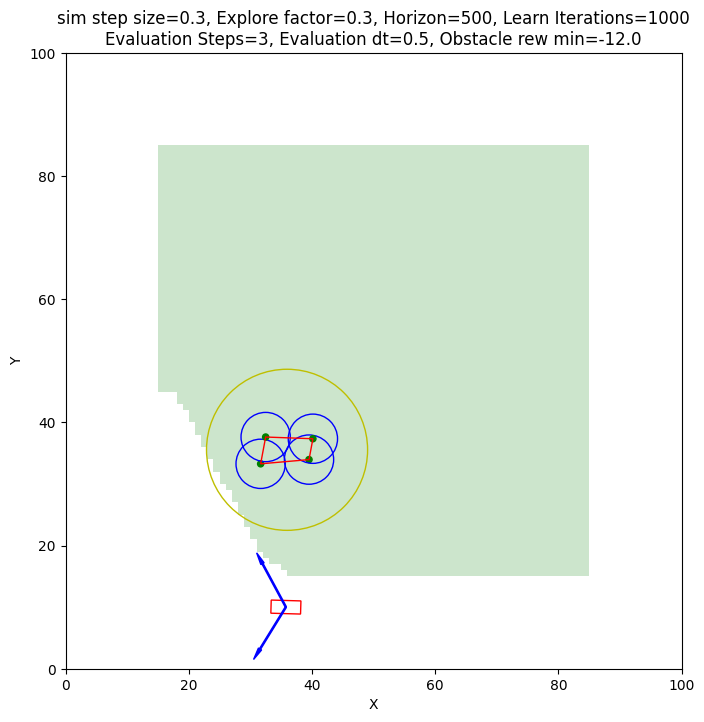

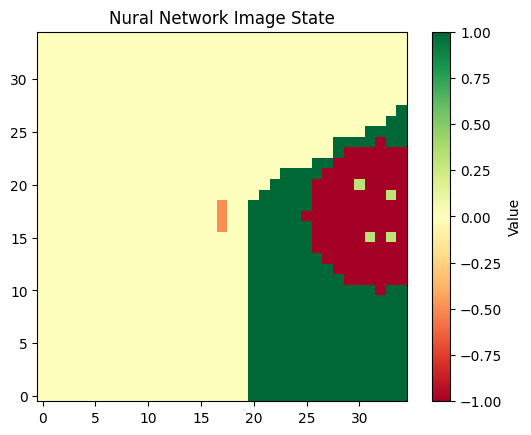

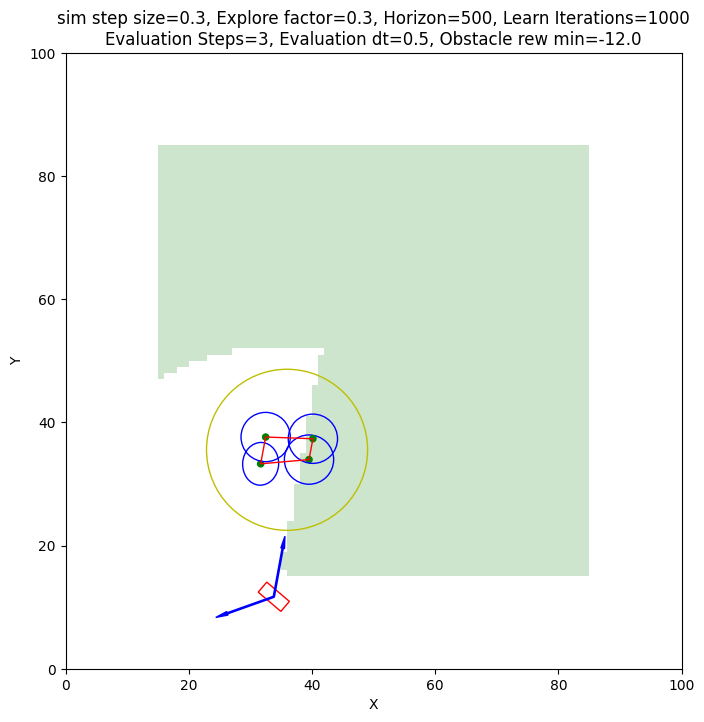

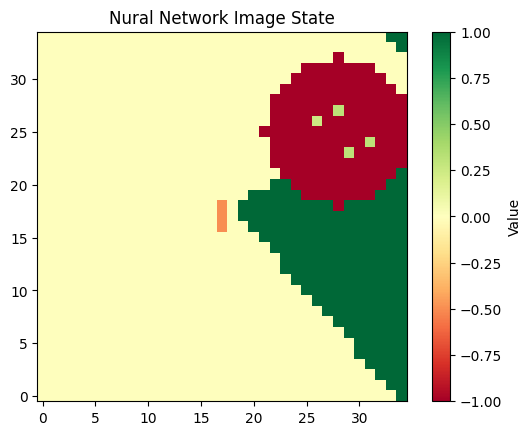

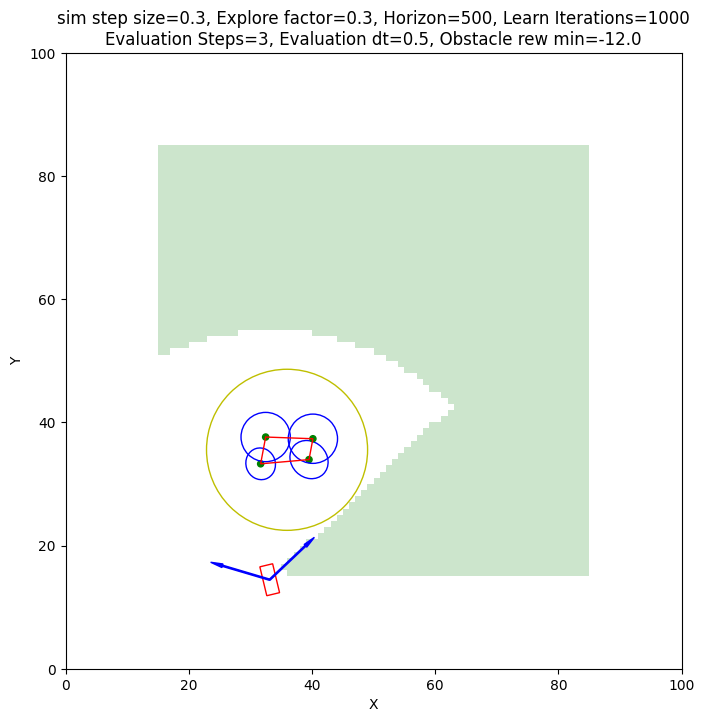

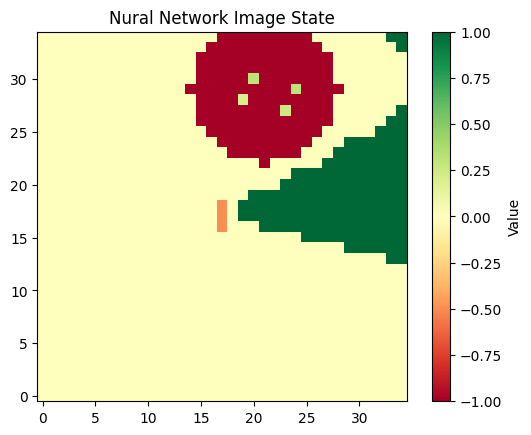

In [10]:
state = starting_state
state[0][2] = 5. # Set starting velocity if wanted
grid = explore_grid.grid
start_time = timeit.default_timer()
grid, num_updated = explore_grid.update(state, grid)
print("Time to update:", timeit.default_timer() - start_time)

explore_grid.draw_grid(grid)
env.draw_state(state)
nn_car_state, nn_image_state = get_image_based_state(env, state, width_pixels=35, 
        width_meters=60, explore_grid=grid, grid_origin=explore_grid.grid_origin, meters_per_pixel=explore_grid.meters_per_pixel)
plot_state_image(nn_image_state, 'Nural Network Image State')

for _ in range(5):
    state, reward, done = env.step(state, [1., -1.])
    print(f'new car state: {state[0]}')
    grid, num_updated = explore_grid.update(state, grid)
    explore_grid.draw_grid(grid)
    env.draw_state(state)
    nn_car_state, nn_image_state = get_image_based_state(env, state, width_pixels=35, 
        width_meters=60, explore_grid=grid, grid_origin=explore_grid.grid_origin, meters_per_pixel=explore_grid.meters_per_pixel)
    plot_state_image(nn_image_state, 'Nural Network Image State')